In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


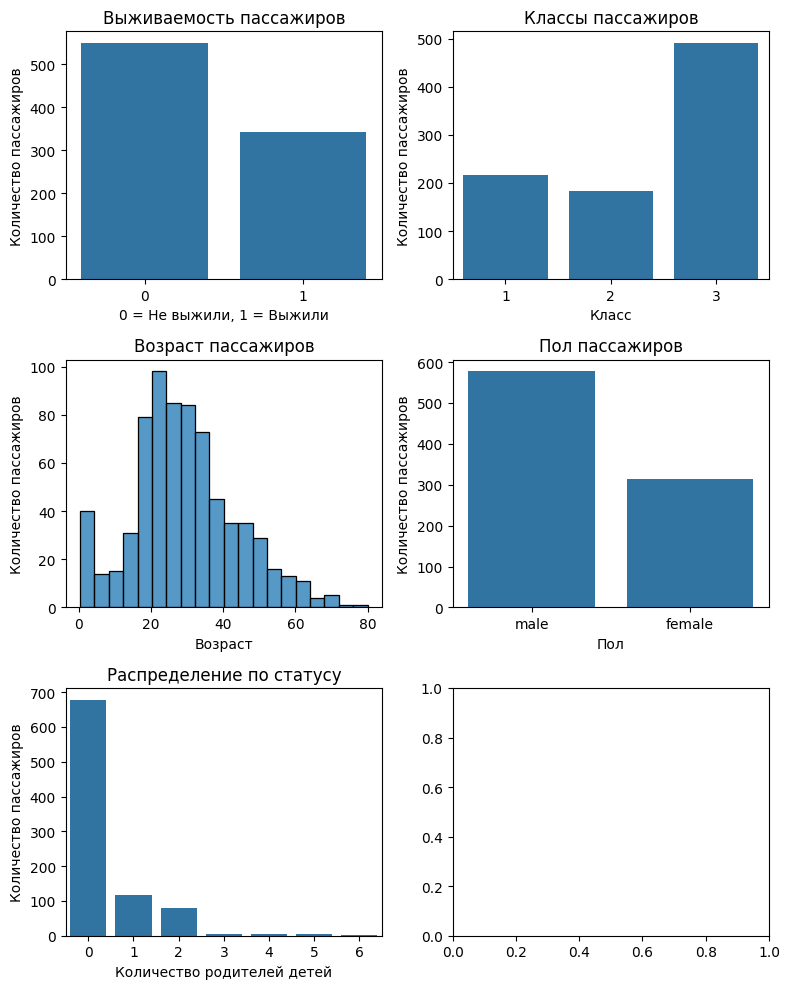

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))

# Survived
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Выживаемость пассажиров')
axes[0, 0].set_xlabel('0 = Не выжили, 1 = Выжили')
axes[0, 0].set_ylabel('Количество пассажиров')


# Pclass
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Классы пассажиров')
axes[0, 1].set_xlabel('Класс')
axes[0, 1].set_ylabel('Количество пассажиров')


# Age
sns.histplot(df['Age'].dropna(), ax=axes[1, 0])
axes[1, 0].set_title('Возраст пассажиров')
axes[1, 0].set_xlabel('Возраст')
axes[1, 0].set_ylabel('Количество пассажиров')


# Sex
sns.countplot(x='Sex', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Пол пассажиров')
axes[1, 1].set_xlabel('Пол')
axes[1, 1].set_ylabel('Количество пассажиров')


# Parch
sns.countplot(x='Parch', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Распределение по статусу')
axes[2, 0].set_xlabel('Количество родителей детей')
axes[2, 0].set_ylabel('Количество пассажиров')

plt.tight_layout()
plt.show()

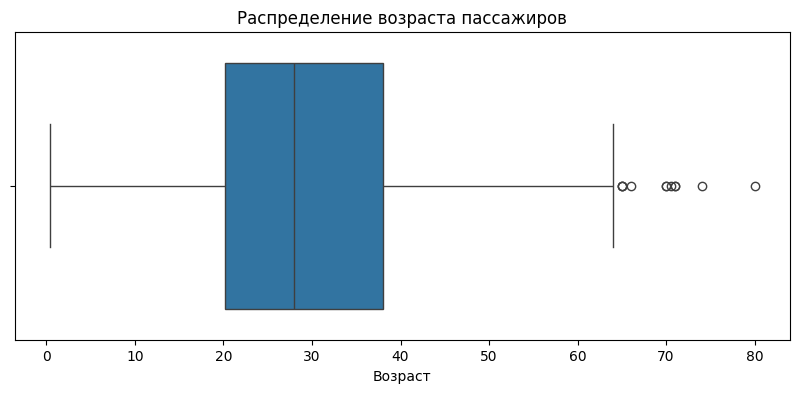

In [60]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Age', data=df)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.show()


#Интепретация графика:
#График показывает распределение возраста пассажиров Титаника, при этом видно, что срединное значение пассажиров (медиана) меньше 30 лет,
#однако, важно отметить наличие выбросов справа, которые находятся за пределами границы ящика с усами (Q3 + 1,5*IQR) с возрастом
#приблизительно от 65 до 80 лет.

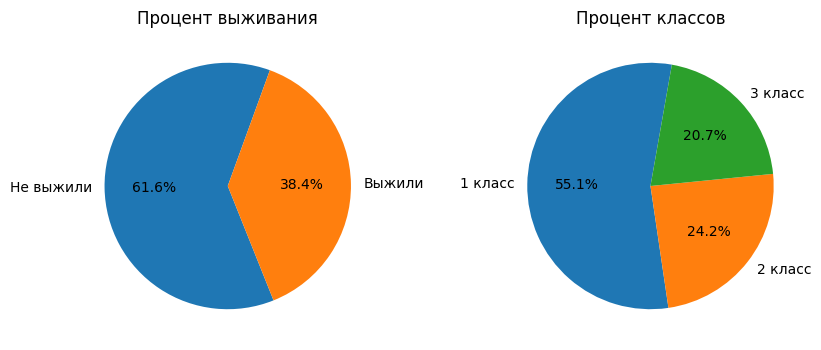

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

survived_counts = df['Survived'].value_counts()
axes[0].pie(survived_counts, labels=['Не выжили', 'Выжили'], autopct='%1.1f%%', startangle=70)
axes[0].set_title('Процент выживания')

pclass_counts = df['Pclass'].value_counts()
axes[1].pie(pclass_counts, labels=['1 класс', '2 класс', '3 класс'], autopct='%1.1f%%', startangle=80)
axes[1].set_title('Процент классов')

plt.show()

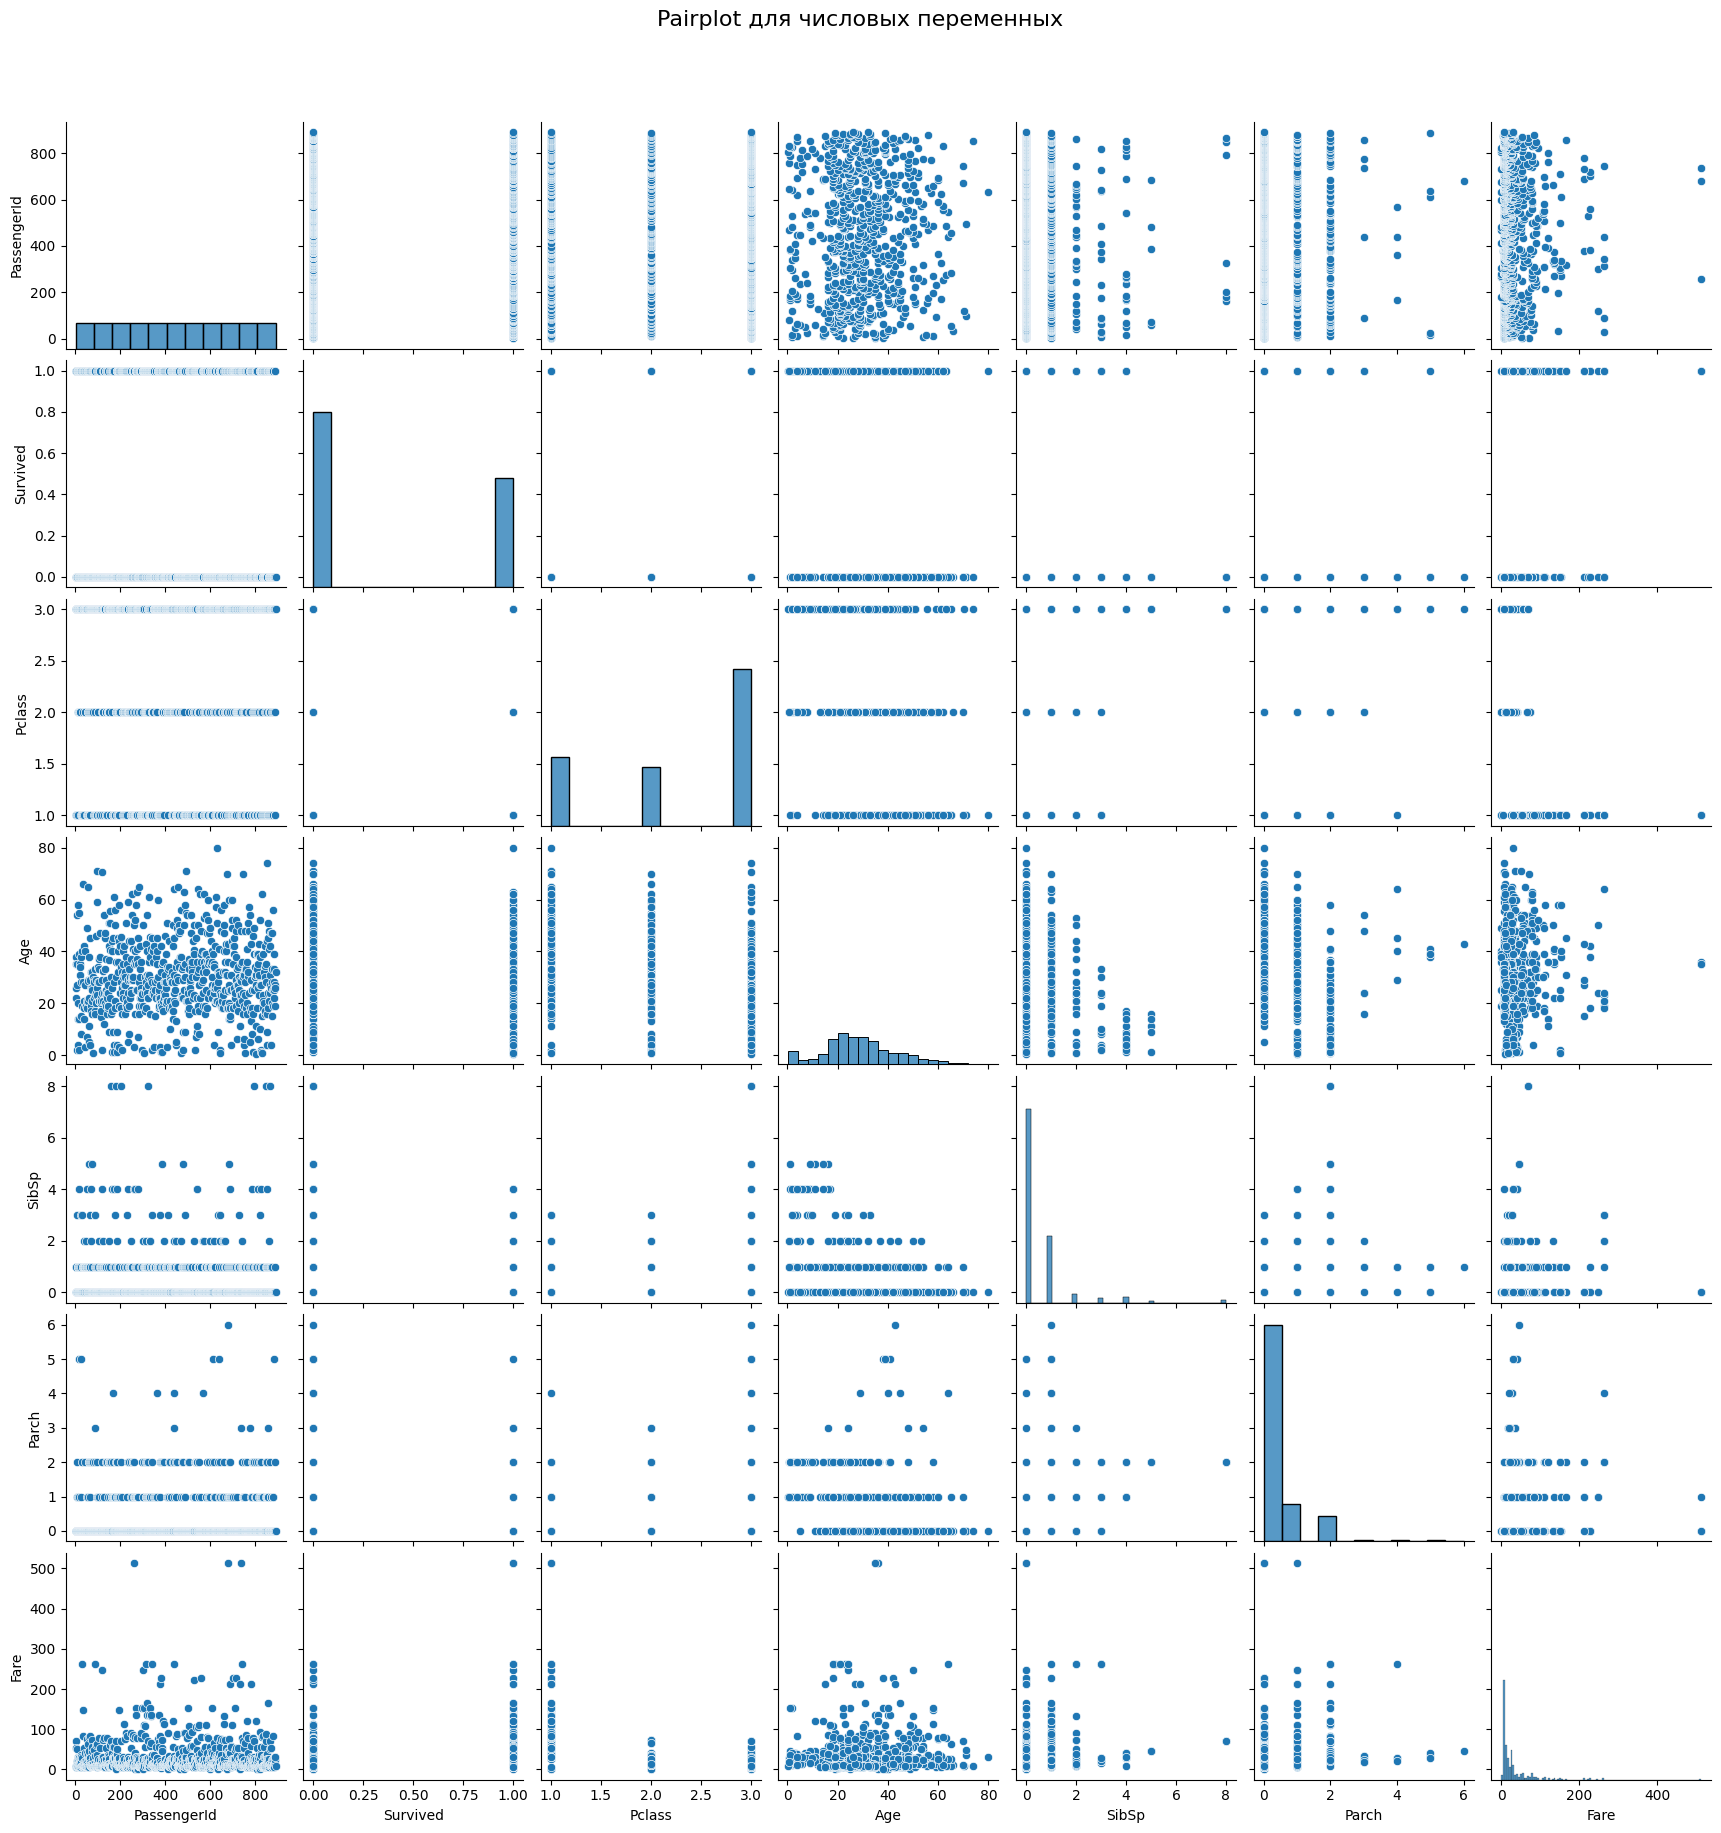

In [71]:
sns.pairplot(df.select_dtypes(include=['float', 'int']))
plt.suptitle('Pairplot для числовых переменных', fontsize=16, y=1.05)
plt.show()

In [117]:
data = dict(
    labels=["1 класс", "2 класс", "3 класс",
            "Женщины", "Мужчины",
            "Женщины", "Мужчины",
            "Женщины", "Мужчины"],
    parents=["Итого", "Итого", "Итого", "1 класс", "1 класс", "2 класс", "2 класс", "3 класс", "3 класс"],
    values=[len(df[df['Pclass'] == 1]),
            len(df[df['Pclass'] == 2]),
            len(df[df['Pclass'] == 3]),
            len(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]),
            len(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')]),
            len(df[(df['Pclass'] == 2) & (df['Sex'] == 'female')]),
            len(df[(df['Pclass'] == 2) & (df['Sex'] == 'male')]),
            len(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')]),
            len(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')])]
)

fig = px.sunburst(data, names='labels', parents='parents', values='values', branchvalues='total')
fig.update_layout(title_text="Распределение пассажиров по полу и классу")
fig.show()